In [22]:
import tensorflow as tf
from src.DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyarrow import feather

In [2]:
autoencoder = tf.keras.models.load_model('data/autoencoder1')

In [3]:
prediction_gen = DataGenerator(directory='data/Spotify/pngs/', batch_size=1, shuffle=False)

Found 160962 files for Generator set


In [4]:
prediction_gen.size

160962

2022-08-11 11:32:59.471696: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


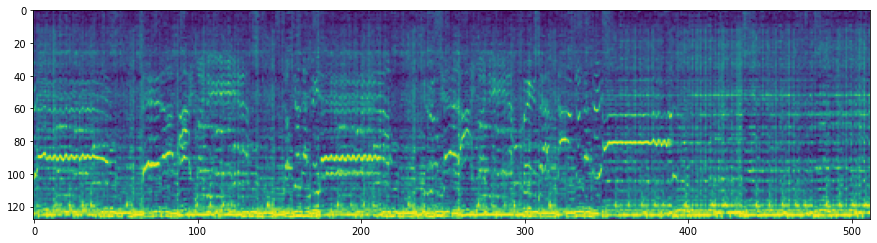

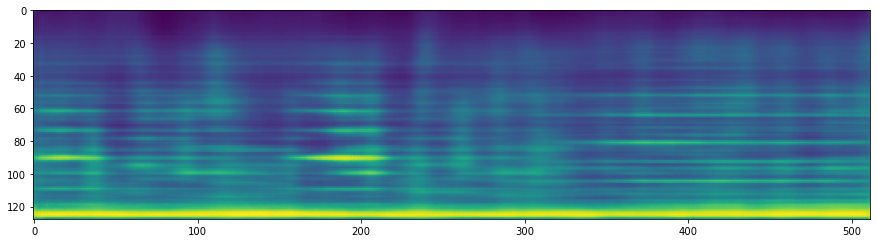

In [5]:
test_img = prediction_gen.take(0)[0]

prediction = autoencoder(test_img)

plt.figure(figsize=(15,5))
plt.imshow(test_img[0])
plt.show()
plt.figure(figsize=(15,5))
plt.imshow(np.array(prediction[0]*255))

In [102]:
results = []
search_range = 10000
for i in range(search_range):
    filename, latent_img, _ = prediction_gen.take(i, return_filename=True)
    
    latent_space = np.array(autoencoder.encoder(latent_img))[0]
    
    result={
        'id':str(filename[0]).split('.')[0],
        'filename':str(filename[0]),
          }
    for idx, col in enumerate(latent_space):
        result[f'latent_{idx}'] = col
        
    results.append(result)
    print(f'{i+1} / {search_range}', end='\r')

    

In [103]:
results_df = pd.DataFrame(results)

In [104]:
results_df

,id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,2e2aOrLcQTUEXR4hqRmZu5,2e2aOrLcQTUEXR4hqRmZu5.png,0.686689,-62.977371,17.201159,22.265810,0.966038,9.412171,-25.597452,-46.439079,...,-59.579975,35.985313,0.272452,30.616669,63.638504,12.906801,18.856525,32.909412,-28.711048,8.780145
1,3amqcqX7csFJLBdIxwOdiW,3amqcqX7csFJLBdIxwOdiW.png,-5.321854,15.092813,15.076782,13.554296,49.266850,-44.978455,74.120392,22.472807,...,-107.667946,15.358998,-6.416865,36.716381,125.666328,-71.599350,85.620399,8.379080,-64.815567,7.141287
2,22eaeE3cqnf7K15mZPnTLe,22eaeE3cqnf7K15mZPnTLe.png,31.977345,32.199516,32.929474,27.334719,11.438016,-17.832800,-41.404213,-39.501183,...,-40.488693,50.196987,66.613411,1.014559,148.998199,-58.548874,5.000437,12.558893,-54.168407,-30.090960
3,7EayHugLOr5fZBwRGMA4aF,7EayHugLOr5fZBwRGMA4aF.png,-20.493362,-37.085800,13.549940,-45.052982,46.763153,29.207193,-50.009834,-41.493324,...,-31.374210,53.246094,29.047949,30.323973,70.700180,-69.417725,2.881166,-39.312420,-83.179832,-36.652843
4,2409Wwvk0yQHUERXvPLFGG,2409Wwvk0yQHUERXvPLFGG.png,-6.566336,4.052312,-26.886557,12.153070,50.082180,-3.136319,-31.949110,32.695778,...,-60.240864,39.583286,7.897861,-26.891798,130.125534,-67.258560,-7.846012,17.756178,-6.985524,26.080641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5MEZXqritQxwAeJah2lrDY,5MEZXqritQxwAeJah2lrDY.png,-4.757932,11.857281,13.192478,24.279373,59.884594,6.480619,-3.137313,-29.010012,...,-58.092392,-9.465392,45.555885,40.230389,76.209969,-16.366154,14.635944,2.652091,-17.566158,-9.246875
9996,24g0FCCWzSHr6FBIOJUPv6,24g0FCCWzSHr6FBIOJUPv6.png,5.359205,7.793387,37.041676,38.740913,34.961292,-60.473000,32.286884,19.959160,...,-12.549742,-14.205480,24.758070,17.865808,74.407959,-38.554943,75.861359,45.251431,21.576130,-7.508354
9997,0Yr0XWjBRS5OMv41sScQQp,0Yr0XWjBRS5OMv41sScQQp.png,7.413820,-49.949734,-6.385013,38.007473,80.841850,0.025277,-4.296146,-8.389406,...,-89.247276,41.346981,-23.221838,24.196669,54.474392,-66.724564,48.227161,23.248512,32.788872,24.702394
9998,4ftIpG2nTYMmZmW1astKxj,4ftIpG2nTYMmZmW1astKxj.png,-8.672316,-16.717726,-28.920713,-29.123999,-30.930700,-13.647559,2.643000,-21.060822,...,-80.872391,51.494781,28.857975,17.452850,182.066620,-30.064957,35.493916,16.627434,55.272015,-47.688293


In [105]:
tracks_df = feather.read_feather('data/all_tracks.feather')

In [106]:
track_latents = results_df.merge(tracks_df, how='left', left_on='id', right_on='track_id')

In [107]:
track_latents = track_latents.drop_duplicates(subset='id')

In [108]:
def get_top_genre(x):
    if len(x) > 0:
        return x[0]
    else:
        return float('nan')

track_latents['genre'] = track_latents['artist_genres'].apply(get_top_genre)

In [109]:
artist_latents = track_latents.groupby('artist_name').mean().dropna()

In [118]:
genre_latents = track_latents.groupby('genre').mean().dropna()

In [110]:
latent_cols = [f'latent_{i}' for i in range(256)]

In [111]:
track_latents = track_latents.reset_index(drop=True)

In [142]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

cos = []
for i in artist_latents.index:
    similiarity = cosine_similarity(np.array([track_latents.loc[2150, latent_cols]]), np.array([artist_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=True)

[(array([[1.]]), 'The Spotnicks'),
 (array([[0.76040408]]), 'The Best Pessimist'),
 (array([[0.7494601]]), 'Neuman'),
 (array([[0.74549981]]), 'Vapors of Morphine'),
 (array([[0.73801409]]), 'Docteur Nico'),
 (array([[0.7360243]]), 'Nekropsi'),
 (array([[0.73389293]]), 'BLACK CATS'),
 (array([[0.73327556]]), 'Blank Dogs'),
 (array([[0.73121857]]), 'Slim Gaillard'),
 (array([[0.7275345]]), 'Cosmonauts'),
 (array([[0.72245934]]), 'Redbone'),
 (array([[0.72195407]]), 'Jane Remover'),
 (array([[0.72027193]]), 'Dazzling Killmen'),
 (array([[0.71970795]]), 'Chisel'),
 (array([[0.71948263]]), 'Oneida'),
 (array([[0.7193667]]), 'Hank C. Burnette'),
 (array([[0.71847127]]), 'The Falcon'),
 (array([[0.71802973]]), 'Brave Little Abacus'),
 (array([[0.71775208]]), 'PSG'),
 (array([[0.7176216]]), 'SOM'),
 (array([[0.71742676]]), 'The "5" Royales'),
 (array([[0.71541807]]), 'Betharia Sonatha'),
 (array([[0.7152523]]), 'Tsehaytu Beraki'),
 (array([[0.71442495]]), 'Gackt'),
 (array([[0.71418108]]), 'S

In [133]:
cos = []
for i in track_latents.index:
    similiarity = euclidean_distances(np.array([track_latents.loc[2150, latent_cols]]), np.array([track_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=False)

[(array([[1.07895932e-05]]), 2150),
 (array([[498.03634912]]), 8954),
 (array([[498.53983901]]), 5444),
 (array([[499.65475969]]), 5438),
 (array([[500.57313942]]), 3123),
 (array([[502.41097581]]), 4303),
 (array([[504.68641592]]), 3058),
 (array([[505.58788698]]), 5162),
 (array([[506.75011322]]), 6629),
 (array([[509.94450562]]), 5851),
 (array([[511.01670079]]), 3663),
 (array([[511.56598506]]), 8735),
 (array([[515.65171358]]), 8433),
 (array([[516.30854596]]), 689),
 (array([[516.9312616]]), 7062),
 (array([[519.24721501]]), 2133),
 (array([[519.27867091]]), 7475),
 (array([[519.28941228]]), 6713),
 (array([[521.64974619]]), 3518),
 (array([[521.80036524]]), 3612),
 (array([[522.05469324]]), 9749),
 (array([[523.24249837]]), 3794),
 (array([[523.63178509]]), 4615),
 (array([[523.79599628]]), 87),
 (array([[524.26907315]]), 2610),
 (array([[524.60553483]]), 8725),
 (array([[524.8377416]]), 9075),
 (array([[524.98573517]]), 2490),
 (array([[525.13383933]]), 44),
 (array([[525.87957

In [141]:
cos = []
for i in genre_latents.index:
    similiarity = euclidean_distances(np.array([track_latents.loc[2150, latent_cols]]), np.array([genre_latents.loc[i, latent_cols]]))
    cos.append((similiarity, i))
    
sorted(cos, key=lambda x: x[0], reverse=False)

[(array([[460.15289569]]), 'psych gaze'),
 (array([[467.15733775]]), 'surf music'),
 (array([[469.77434463]]), 'boston rock'),
 (array([[470.76564683]]), 'blues rock'),
 (array([[473.2907776]]), 'alternative pop'),
 (array([[474.70069981]]), 'math rock'),
 (array([[477.8074856]]), 'album rock'),
 (array([[483.20262322]]), 'oi'),
 (array([[484.03426132]]), 'neo classical metal'),
 (array([[485.09003893]]), 'japanese rockabilly'),
 (array([[485.49832607]]), 'classic bollywood'),
 (array([[486.00379125]]), 'olympia wa indie'),
 (array([[488.71391987]]), 'granada indie'),
 (array([[489.40914145]]), 'american post-rock'),
 (array([[489.87956932]]), 'salsa international'),
 (array([[490.8883675]]), 'power pop'),
 (array([[491.00308376]]), 'experimental indie rock'),
 (array([[494.27861016]]), 'ethereal wave'),
 (array([[494.52112584]]), 'indie punk'),
 (array([[495.18089126]]), 'canadian metal'),
 (array([[495.3255395]]), 'hard rock'),
 (array([[495.34493681]]), 'chicago punk'),
 (array([[49

In [128]:
track_latents.iloc[2150]['track_uri']

'spotify:track:5yKIuL0WtNTk0t89VE6sBo'

In [144]:
track_latents.iloc[5438]['track_uri']

'spotify:track:4FwEjr879G2V4UrI4IaItP'

In [112]:
track_latents[track_latents['genre'] == 'surf music']['track_uri']

3       spotify:track:7EayHugLOr5fZBwRGMA4aF
13      spotify:track:6RT5QmXLnUi77sqbTJwUwE
1032    spotify:track:3gOH9pFshXCPyo4pEZDheu
1291    spotify:track:3k2nphS23jl3gd8EFSowJv
1604    spotify:track:5YFbEWOKw3mJh3R17fvQsu
2150    spotify:track:5yKIuL0WtNTk0t89VE6sBo
2275    spotify:track:3lY53q4g9snV5ow5uccvNe
2832    spotify:track:0gf6O27ocS5bdSEl3ov5t3
4324    spotify:track:00vnQiMZ2n5OxkCtuR5pL9
6417    spotify:track:4paPBJ0L7wk90ld7sNG2G5
6699    spotify:track:7bmI8UPdl3m2L4hp8f8PAB
6730    spotify:track:4995yGcYUpCnyxYjZnsckT
8050    spotify:track:7krS9dI67Ho5YUYQc7jyGI
8167    spotify:track:6a4yyrn64G0DzTvvBizOX6
9950    spotify:track:1USN1cN9YL0WO6scLnkRRW
Name: track_uri, dtype: object